## 逻辑斯蒂回归损失函数可视化

### 1. 导包

In [1]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale # 数据标准化Z-score ！！！！！！！！

### 2. 加载数据

In [2]:
# 1、加载乳腺癌数据
data = datasets.load_breast_cancer()

# 逻辑斯蒂回归，内部是梯度下降，无量纲化处理：标准化
# 标准化
X, y = scale(data['data'][:, :2]), data['target']

In [6]:
X

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       ...,
       [ 0.70228425,  2.0455738 ],
       [ 1.83834103,  2.33645719],
       [-1.80840125,  1.22179204]])

In [9]:
y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### 3. 建模

In [3]:
# 2、求出两个维度对应的数据在逻辑回归算法下的最优解
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression()

### 4. 方程系数

In [4]:
lr.coef_

array([[-3.33731028, -0.8771414 ]])

In [4]:
# 3、分别把两个维度所对应的参数W1和W2取出来
w1 = lr.coef_[0, 0]
w2 = lr.coef_[0, 1]
print(w1, w2)

-3.3373102846154525 -0.8771414036339872


### 5. sigmoid函数定义

In [5]:
# 4、已知w1和w2的情况下，传进来数据的X，返回数据的y_predict
# 预测的概率
def sigmoid(X, w1, w2):
    z = w1*X[0] + w2*X[1]
    # z = X@lr.coef_.T
    return 1 / (1 + np.exp(-z))

### 6. 损失函数

In [6]:
# 5、传入一份已知数据的X，y，如果已知w1和w2的情况下，计算对应这份数据的Loss损失
def loss_function(X, y, w1, w2):
    loss = 0
    # 遍历数据集中的每一条样本，并且计算每条样本的损失，加到loss身上得到整体的数据集损失
    for x_i, y_i in zip(X, y):
        # 这是计算一条样本的y_predict，即概率
        p = sigmoid(x_i, w1, w2)
        loss += -1*y_i*np.log(p)-(1-y_i)*np.log(1-p)  # log默认的底数是 e
    return loss

### 7. 最优解w1和w2，设置一个范围

In [7]:
# 6、参数w1和w2取值空间
w1_space = np.linspace(w1-2, w1+2, 100)
w2_space = np.linspace(w2-2, w2+2, 100)

# 固定w2,看w1变化如何影响损失函数
loss1_ = np.array([loss_function(X, y, i, w2) for i in w1_space])
# 固定w1,看w2变化如何影响损失函数
loss2_ = np.array([loss_function(X, y, w1, i) for i in w2_space])

(100,)

(100,)

(100, 100)

(100, 100)

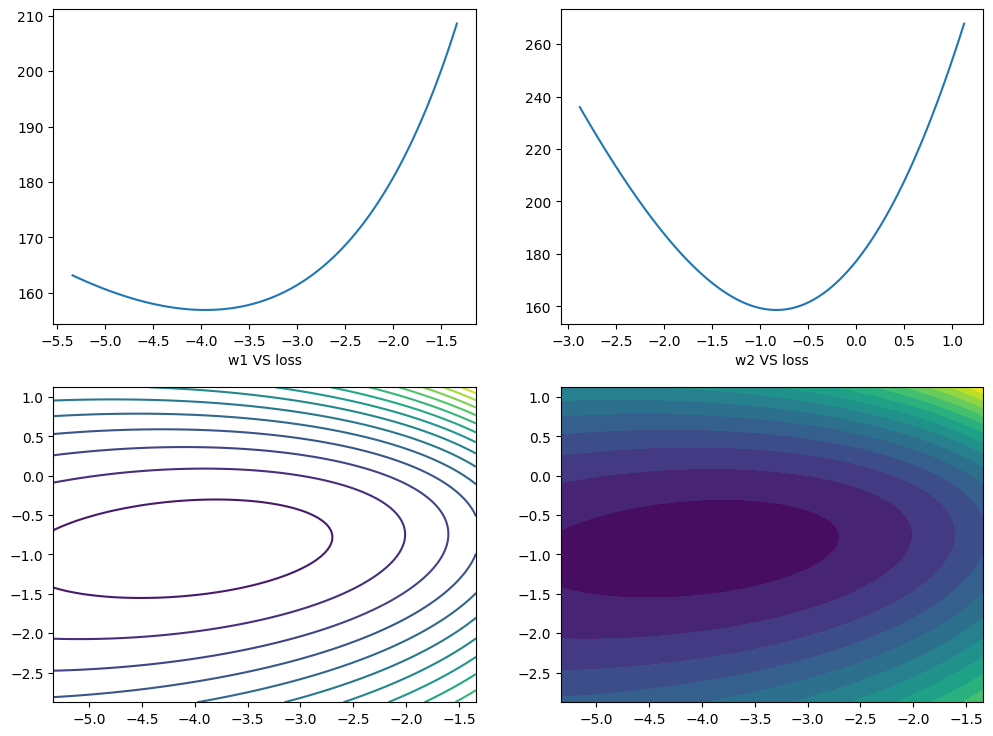

In [11]:
# 7、数据可视化
fig1 = plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.plot(w1_space, loss1_)
plt.xlabel('w1 VS loss')

plt.subplot(2, 2, 2)
plt.plot(w2_space, loss2_)
plt.xlabel('w2 VS loss')

plt.subplot(2, 2, 3)
w1_grid, w2_grid = np.meshgrid(w1_space, w2_space) # 网格交叉
display(w1_space.shape,w2_space.shape,w1_grid.shape,w2_grid.shape)
loss_grid = loss_function(X, y, w1_grid, w2_grid)

plt.contour(w1_grid, w2_grid, loss_grid,20) # 等高线

plt.subplot(2, 2, 4)
plt.contourf(w1_grid, w2_grid, loss_grid,20) # 等高面
plt.show()
# plt.savefig('./4-损失函数可视化.png',dpi = 200)

#### np.meshgrid()演示

In [44]:
A = np.array([1,2,3])
B = np.array([4,6])

np.meshgrid(A,B)

[array([[1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [6, 6, 6]])]

### 8、3D立体可视化

In [18]:
# import warnings
# warnings.filterwarnings('ignore')

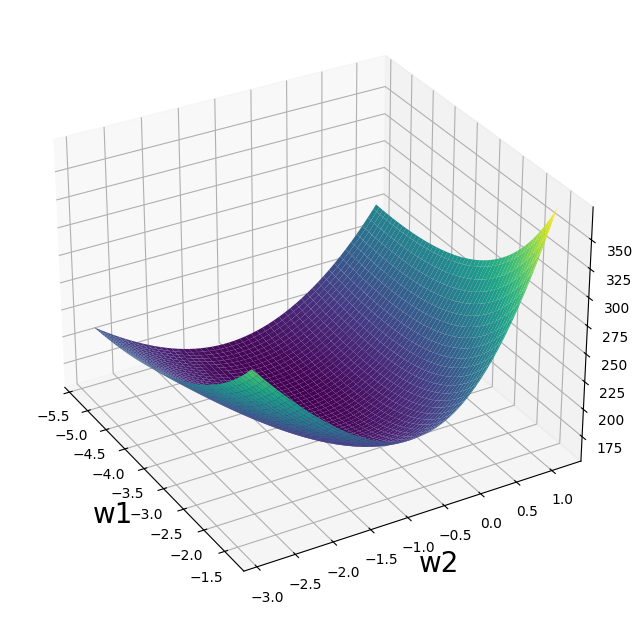

In [14]:
fig2 = plt.figure(figsize=(12,6))
# ax = Axes3D(fig2)  该写法新版本已过时  需要再加一行 fig.add_axes(ax)
ax = Axes3D(fig2)
fig2.add_axes(ax)  # 或者合起来写  ax = fig2.add_axes(Axes3D(fig2))

ax.plot_surface(w1_grid, w2_grid, loss_grid,cmap = 'viridis')

plt.xlabel('w1',fontsize = 20)
plt.ylabel('w2',fontsize = 20)
ax.view_init(30,-30) # 调整视图角度
plt.show()
# plt.savefig('./5-损失函数可视化.png',dpi = 200)